In [1]:
import sys, os
sys.path.append("../..")
import seaborn as sns
import gempy as gp
%matplotlib inline

import numpy as np
#import pandas as pd

In [2]:
# Import data
#geo_data = gp.create_data([0, 30000, 0, 4000, -7000, 1000],[50, 50, 50],
#                         path_o = "foliations_nofaults.csv",
#                         path_i = "interfaces_nofaults.csv")
geo_model = gp.create_model('Permo_Carb_Trough')
gp.init_data(geo_model, [0, 30000., 0, 15000., -7000, 1000.], [50, 50, 50],
                         path_o = '../data/both_lines82and6_foliations_90_270.csv',
                         path_i = '../data/both_lines82and6_interfaces.csv', default_values=False);

In [3]:
gp.get_data(geo_model, 'surface_points').head()

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series
0,10221.66646,5000,-441.42848,0.412689,0.43558,0.541379,Fault2,Default series,1,1
1,10421.66646,5000,-1534.28563,0.416376,0.43558,0.521233,Fault2,Default series,1,1
2,10788.33313,5000,-2712.85706,0.423135,0.43558,0.499507,Fault2,Default series,1,1
3,11321.66646,5000,-3762.85706,0.432967,0.43558,0.480152,Fault2,Default series,1,1
4,12021.66646,5000,-5027.14277,0.445871,0.43558,0.456846,Fault2,Default series,1,1


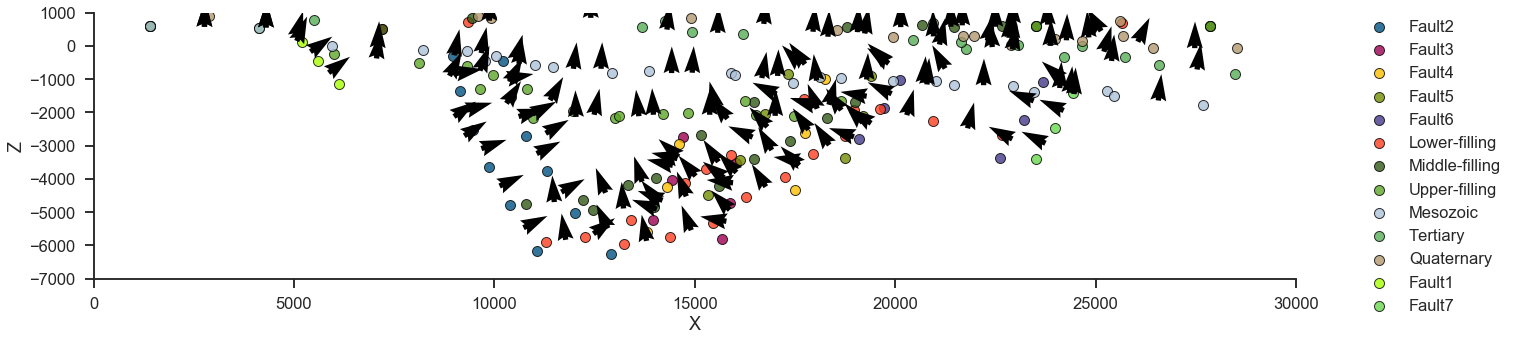

In [4]:
import matplotlib.pyplot as plt
gp.plot.plot_data(geo_model, direction='y')

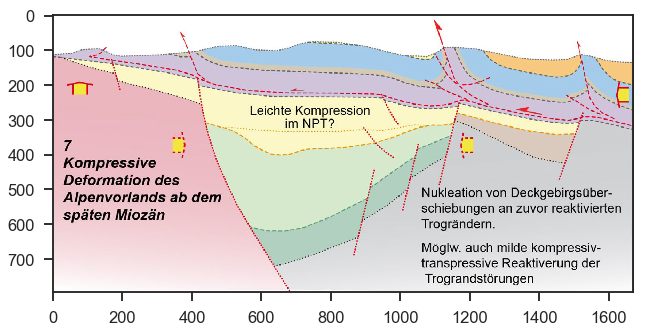

In [5]:
import matplotlib.image as mimg
img = mimg.imread('Screenshot 2019-02-13 at 15.14.59.png')
plt.imshow(img)

In [6]:
# Assign formations to series
gp.map_series_to_surfaces(geo_model,
                         {"Fault7_series": 'Fault7',
                          "Fault6_series": 'Fault6',
                          "Fault2_series": 'Fault2',
                          "Fault5_series": 'Fault5',
                          "Fault1_series": 'Fault1',
                         "Fault3_series": 'Fault3',
                         "Fault4_series": 'Fault4',
                         "Post_tectonic_series": ('Mesozoic', 'Tertiary', 'Quaternary'),
                         "Syn_tectonic_series": ('Middle-filling', 'Upper-filling'),
                         "Pre_tectonic_series": 'Lower-filling'},
                         remove_unused_series=True)
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
12,Fault7,Fault7_series,1,False,#69d84f,1
4,Fault6,Fault6_series,1,False,#443988,2
0,Fault2,Fault2_series,1,False,#015482,3
3,Fault5,Fault5_series,1,False,#728f02,4
11,Fault1,Fault1_series,1,False,#a8ff04,5
1,Fault3,Fault3_series,1,False,#9f0052,6
2,Fault4,Fault4_series,1,False,#ffbe00,7
8,Mesozoic,Post_tectonic_series,1,False,#acc2d9,8
9,Tertiary,Post_tectonic_series,2,False,#56ae57,9
10,Quaternary,Post_tectonic_series,3,False,#b2996e,10


In [7]:
geo_model.set_is_fault(['Fault1_series','Fault7_series','Fault6_series',
                        'Fault2_series', 'Fault5_series', 'Fault3_series', 'Fault4_series'])
#geo_model.set_is_finite_fault(series_fault=['Fault6_series', 'Fault5_series', 'Fault3_series', 'Fault4_series'],
#                              toggle=True)


Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Fault7_series,True,False
Fault6_series,True,False
Fault2_series,True,False
Fault5_series,True,False
Fault1_series,True,False
Fault3_series,True,False
Fault4_series,True,False
Post_tectonic_series,False,False
Syn_tectonic_series,False,False
Pre_tectonic_series,False,False


In [8]:
geo_model.faults.faults_relations_df

,Fault7_series,Fault6_series,Fault2_series,Fault5_series,Fault1_series,Fault3_series,Fault4_series,Post_tectonic_series,Syn_tectonic_series,Pre_tectonic_series,Basement
Fault7_series,False,True,True,True,True,True,True,True,True,True,True
Fault6_series,False,False,True,True,True,True,True,True,True,True,True
Fault2_series,False,False,False,True,True,True,True,True,True,True,True
Fault5_series,False,False,False,False,True,True,True,True,True,True,True
Fault1_series,False,False,False,False,False,True,True,True,True,True,True
Fault3_series,False,False,False,False,False,False,True,True,True,True,True
Fault4_series,False,False,False,False,False,False,False,True,True,True,True
Post_tectonic_series,False,False,False,False,False,False,False,False,False,False,False
Syn_tectonic_series,False,False,False,False,False,False,False,False,False,False,False
Pre_tectonic_series,False,False,False,False,False,False,False,False,False,False,False


In [9]:
gp.activate_interactive_df(geo_model)

In [10]:
geo_model.qi.get('faults_relations')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [11]:
geo_model.faults.faults_relations_df

,Fault7_series,Fault6_series,Fault2_series,Fault5_series,Fault1_series,Fault3_series,Fault4_series,Post_tectonic_series,Syn_tectonic_series,Pre_tectonic_series,Basement
Fault7_series,False,False,False,False,False,False,False,False,False,True,True
Fault6_series,False,False,False,False,False,False,False,False,True,True,True
Fault2_series,False,False,False,False,False,False,False,True,True,True,True
Fault5_series,False,False,False,False,False,False,False,True,True,True,True
Fault1_series,False,False,False,False,False,False,False,True,True,True,True
Fault3_series,False,False,False,False,False,False,False,False,True,True,True
Fault4_series,False,False,False,False,False,False,False,False,True,True,True
Post_tectonic_series,False,False,False,False,False,False,False,False,False,False,False
Syn_tectonic_series,False,False,False,False,False,False,False,False,False,False,False
Pre_tectonic_series,False,False,False,False,False,False,False,False,False,False,False


In [12]:
gp.set_interpolation_data(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[])
# OLD GEMPY
# interp_data = gp.InterpolatorData(geo_data,
#                                 output='geology', compile_theano=True,
#                                 theano_optimizer='fast_compile')

Compiling theano function...
Compilation Done!


In [13]:
sol = gp.compute_model(geo_model, compute_mesh=False)
# OLD GEMPY
#lith_block, fault_block = gp.compute_model(interp_data)

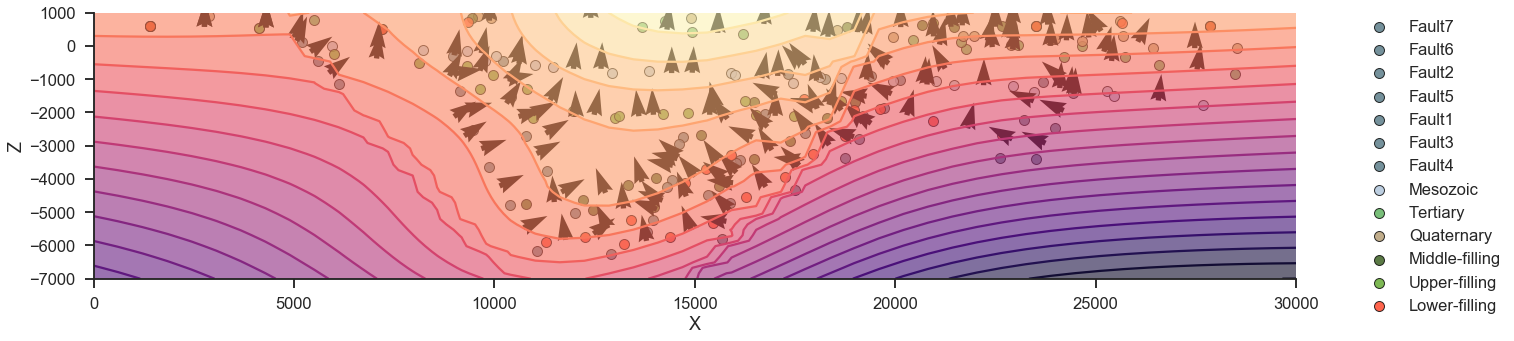

In [22]:
gp.plot.plot_scalar_field(geo_model, cell_number=25, series=8)

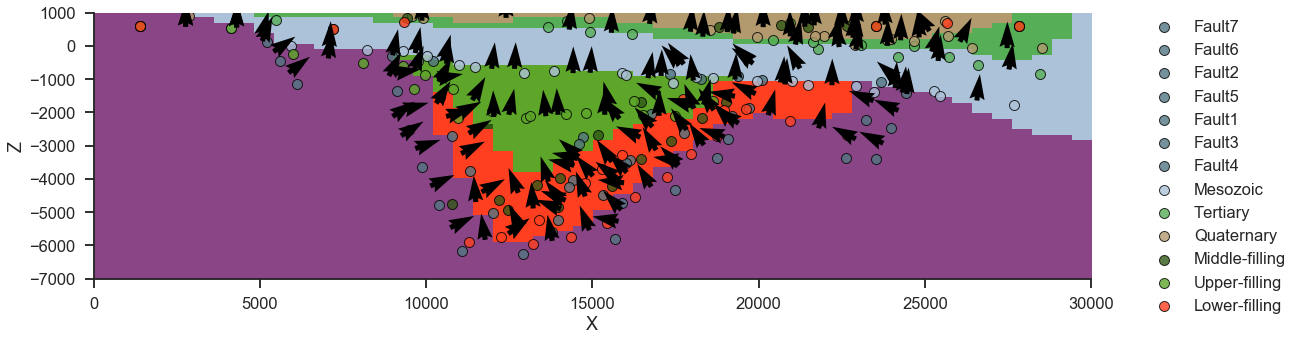

In [35]:
%matplotlib inline
gp.plot.plot_section(geo_model, cell_number=24, direction='y', show_faults=False,
                     show_data=True, interpolation='nearest', ve=1)

In [36]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
12,Fault7,Fault7_series,1,False,#527682,1
4,Fault6,Fault6_series,1,False,#527682,2
0,Fault2,Fault2_series,1,False,#527682,3
3,Fault5,Fault5_series,1,False,#527682,4
11,Fault1,Fault1_series,1,False,#527682,5
1,Fault3,Fault3_series,1,False,#527682,6
2,Fault4,Fault4_series,1,False,#527682,7
10,Quaternary,Post_tectonic_series,1,False,#b2996e,8
9,Tertiary,Post_tectonic_series,2,False,#56ae57,9
8,Mesozoic,Post_tectonic_series,3,False,#acc2d9,10


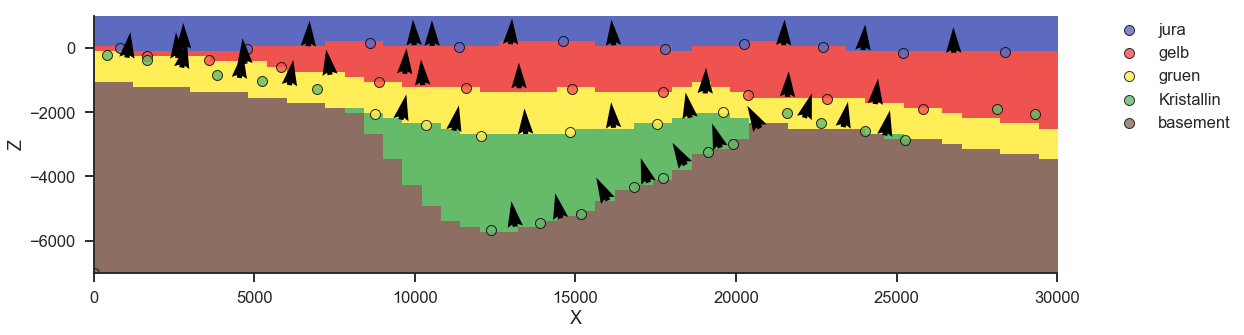

In [8]:
gp.plotting.plot_section(geo_data, lith_block[0], cell_number=24, direction='y', plot_data=True)

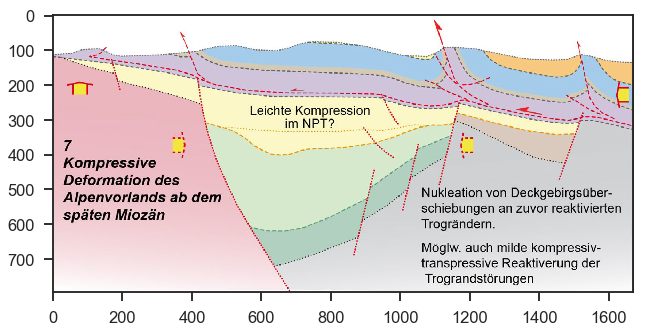

In [59]:
import matplotlib.image as mimg
img = mimg.imread('Screenshot 2019-02-13 at 15.14.59.png')
plt.imshow(img)

In [38]:
geo_model.save_model(name='3D_test', path='../')

True

In [39]:
ids = geo_model.solutions.lith_block
ids = ids.reshape((ids.shape[0],1)).astype(int)

In [40]:
ids.shape

(125000, 1)

In [41]:
grid = geo_model.solutions.grid.values

In [42]:
xyz = np.hstack((grid,ids))

In [20]:
np.savetxt('../section_test_2D/model_grid_2D', xyz, fmt="%.3f, %.3f, %.3f, %i",
          delimiter=",", header="#x,y,z,id", comments='#')

In [34]:
grid[:-1:100,0]

array([  150.,   450.,   750.,  1050.,  1350.,  1650.,  1950.,  2250.,
        2550.,  2850.,  3150.,  3450.,  3750.,  4050.,  4350.,  4650.,
        4950.,  5250.,  5550.,  5850.,  6150.,  6450.,  6750.,  7050.,
        7350.,  7650.,  7950.,  8250.,  8550.,  8850.,  9150.,  9450.,
        9750., 10050., 10350., 10650., 10950., 11250., 11550., 11850.,
       12150., 12450., 12750., 13050., 13350., 13650., 13950., 14250.,
       14550., 14850., 15150., 15450., 15750., 16050., 16350., 16650.,
       16950., 17250., 17550., 17850., 18150., 18450., 18750., 19050.,
       19350., 19650., 19950., 20250., 20550., 20850., 21150., 21450.,
       21750., 22050., 22350., 22650., 22950., 23250., 23550., 23850.,
       24150., 24450., 24750., 25050., 25350., 25650., 25950., 26250.,
       26550., 26850., 27150., 27450., 27750., 28050., 28350., 28650.,
       28950., 29250., 29550., 29850.])

In [66]:
x, z = np.meshgrid(grid[:-1:100,0], grid[:40,2])

In [45]:
ids_resh = ids.reshape(geo_model.grid.regular_grid.resolution[0],
                      geo_model.grid.regular_grid.resolution[1],
                      geo_model.grid.regular_grid.resolution[2]).T

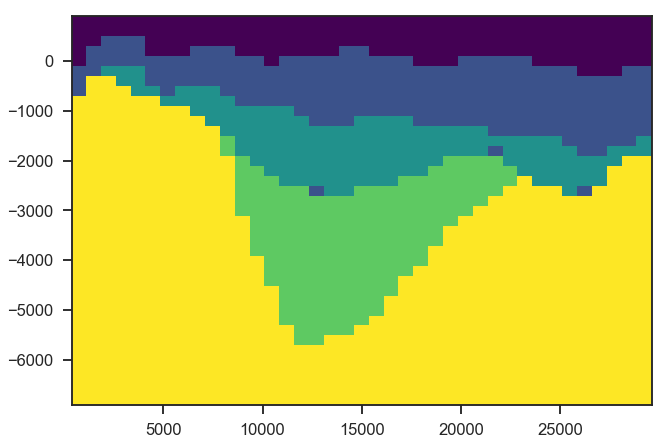

In [70]:
plt.pcolor(x, z, ids_resh[:,5,:], cmap='viridis')

In [43]:
_x, _y, _z = (slice(0, geo_model.grid.regular_grid.resolution[0]),
             slice(0, geo_model.grid.regular_grid.resolution[1]),
             slice(0, geo_model.grid.regular_grid.resolution[2]))
extent_v = geo_model.grid.extent[[0, 1, 4, 5]]

In [46]:
ids_resh[_x, _y, _z].T.shape

(50, 50, 50)

In [27]:
extent_v

array([    0., 30000., -7000.,  1000.])

In [47]:
np.savetxt('../lith_vector_3D', ids, fmt="%i", header="id", comments="#")